In [1]:
import json
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [2]:
font_manager.fontManager.ttflist.extend(
    font_manager.createFontList(
        font_manager.findSystemFonts(fontpaths="/users/amtseng/modules/fonts")
    )
)
plot_params = {
    "axes.titlesize": 22,
    "axes.labelsize": 20,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "font.family": "Roboto",
    "font.weight": "bold"
}
plt.rcParams.update(plot_params)

/users/amtseng/miniconda3/envs/tfmodisco-mini/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
def import_metrics_json(models_path, run_num):
    """
    Looks in `{models_path}/{run_num}/metrics.json` and returns the contents as a
    Python dictionary. Returns None if the path does not exist, or if the JSON is
    malformed.
    """
    path = os.path.join(models_path, str(run_num), "metrics.json")
    if not os.path.exists(path):
        print("Path does not exist: %s" % path)
        return None
    try:
        with open(path, "r") as f:
            return json.load(f)
    except json.JSONDecodeError:
        print("Malformed JSON: %s" % path)
        return None

In [4]:
def extract_metrics_values(metrics, key):
    """
    From a single metrics dictionary (i.e. the imported metrics.json for a
    single run), extracts the set of values with the given key.
    """
    return metrics[key]["values"]

In [5]:
def plot_count_vs_profile_performance(metrics_list):
    count_pears = [
        extract_metrics_values(m, "summit_count_pearson")[0][0]
        for m in metrics_list
    ]
    cross_ent = [
        extract_metrics_values(m, "summit_prof_jsd")[0][0]
        for m in metrics_list
    ]
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.scatter(count_pears, cross_ent)
    ax.set_xlabel("Test count Pearson")
    ax.set_ylabel("Test profile JSD")
    plt.show()
    
    return scipy.stats.spearmanr(count_pears, cross_ent)[0]

In [6]:
model_base = "/users/amtseng/tfmodisco/models/trained_models/"
tfs = ["E2F6", "FOXA2", "SPI1", "CEBPB", "MAX", "GABPA", "MAFK", "JUND", "NR3C1-reddytime", "REST"]
tf_num_tasks = {
    "E2F6": 2,
    "FOXA2": 4,
    "SPI1": 4,
    "CEBPB": 7,
    "MAX": 7,
    "GABPA": 9,
    "MAFK": 9,
    "JUND": 14,
    "NR3C1-reddytime": 16,
    "REST": 20
}

stats_tsv = "/users/amtseng/tfmodisco/results/model_stats/singletask_profile_allfolds_stats.tsv"
best_runs = {}
for tf in tfs:
    best_runs[tf] = []
    for i in range(tf_num_tasks[tf]):
        best_runs[tf].append([0] * 10)
with open(stats_tsv, "r") as f:
    next(f)
    for line in f:
        tokens = line.split("\t")
        tf_name, task_index, fold_num, run_num = tokens[:4]
        task_index, fold_num = int(task_index), int(fold_num)
        best_runs[tf_name][task_index][fold_num - 1] = run_num

E2F6 0


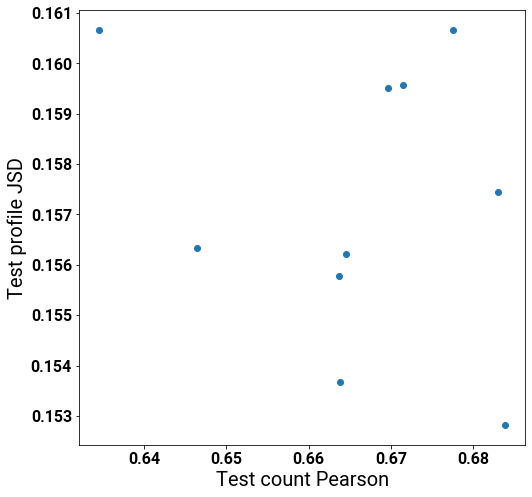

-0.13939393939393938
E2F6 1


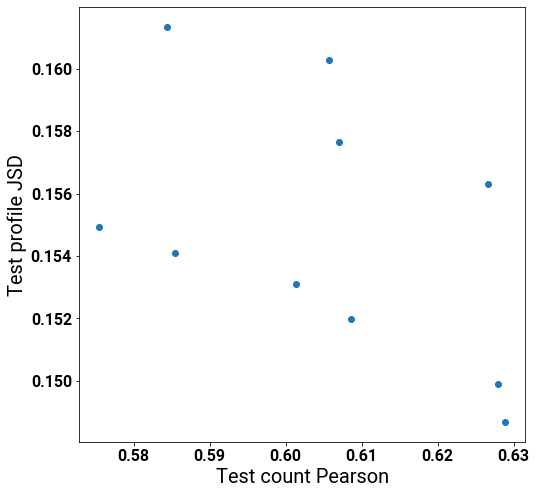

-0.5757575757575757
FOXA2 0


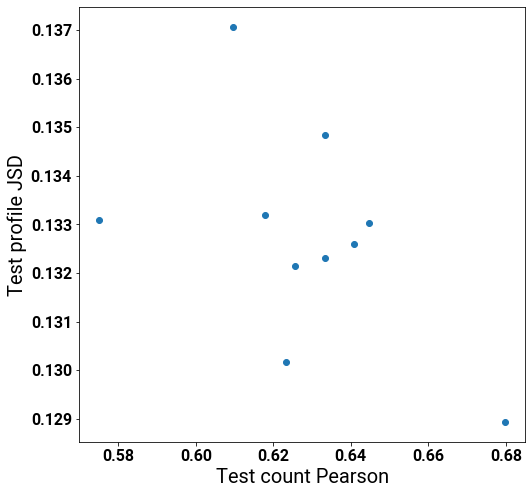

-0.4545454545454545
FOXA2 1


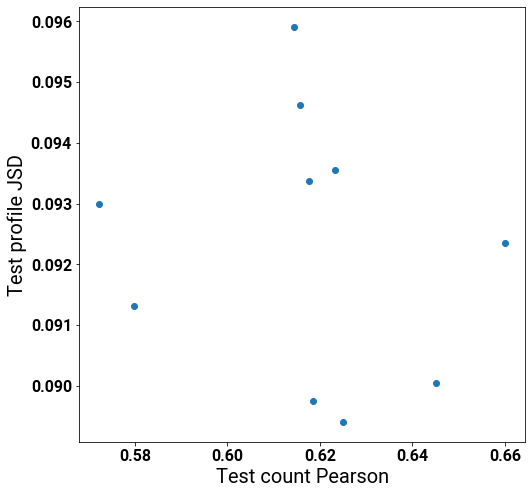

-0.41818181818181815
FOXA2 2


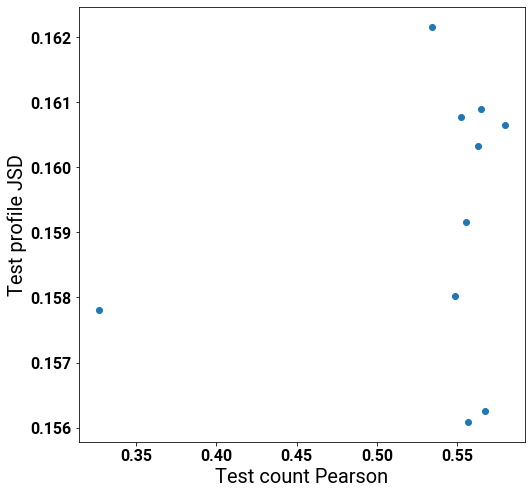

-0.0303030303030303
FOXA2 3


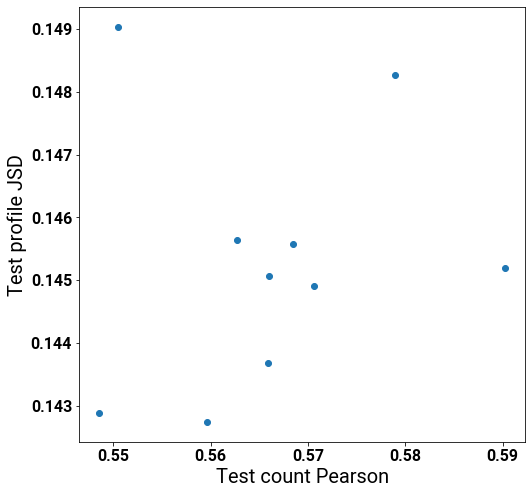

0.2606060606060606
SPI1 0


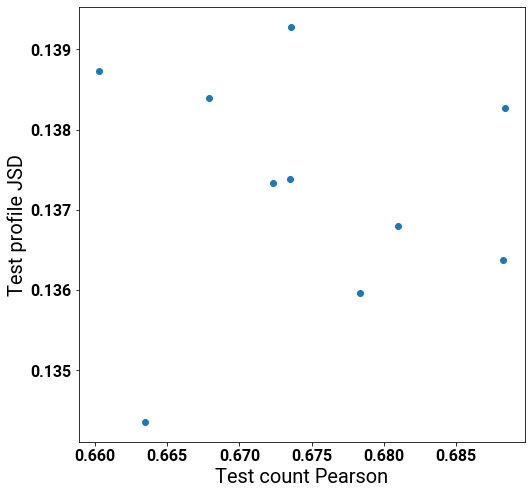

-0.17575757575757575
SPI1 1


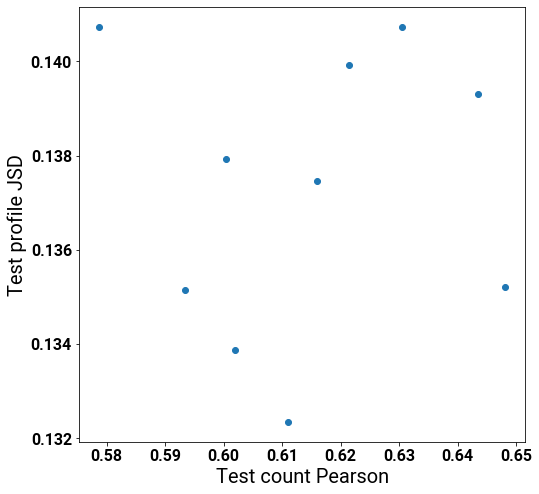

0.1515151515151515
SPI1 2


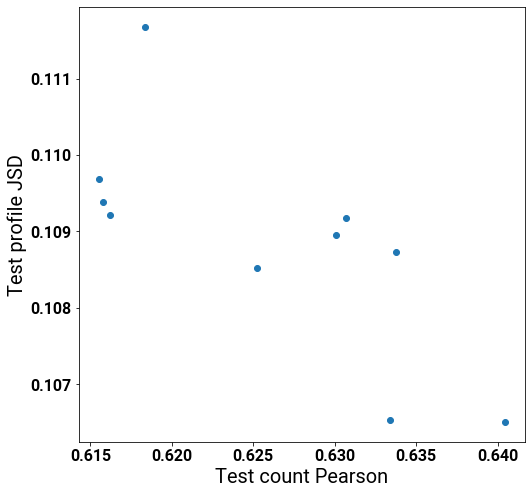

-0.8181818181818182
SPI1 3


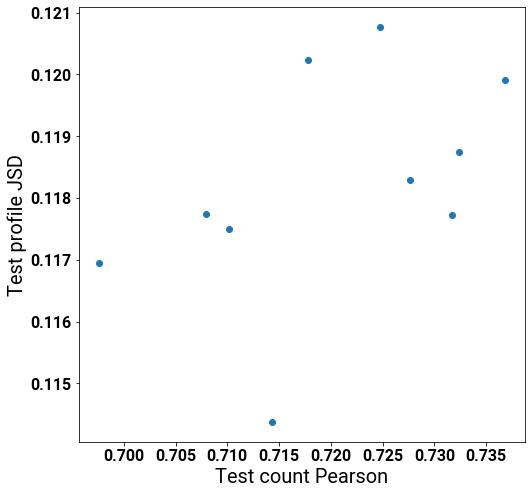

0.5393939393939393
CEBPB 0


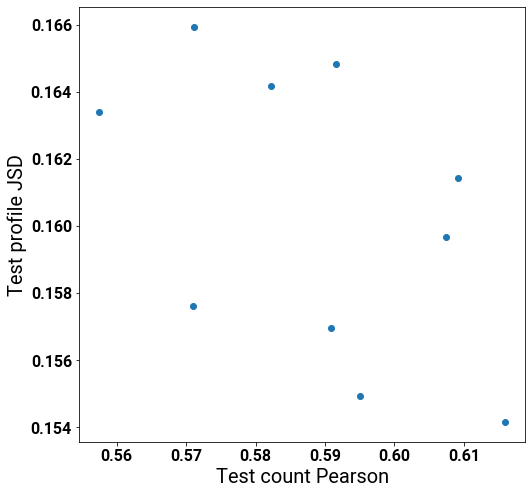

-0.4666666666666666
CEBPB 1


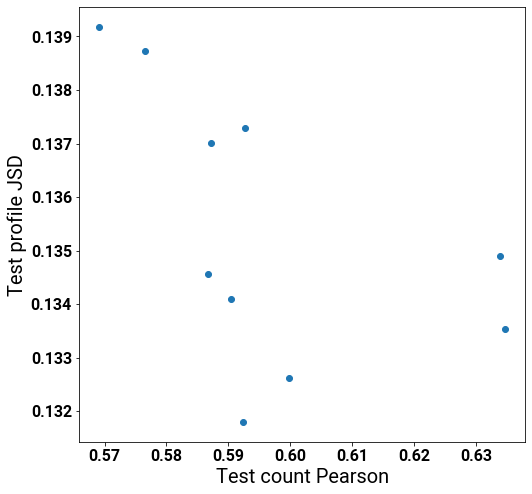

-0.6
CEBPB 2


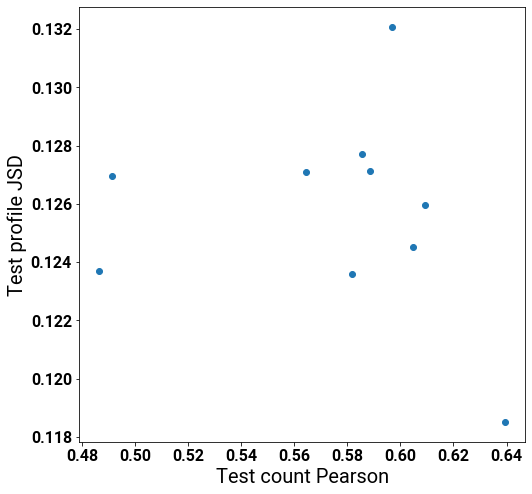

-0.10303030303030303
CEBPB 3


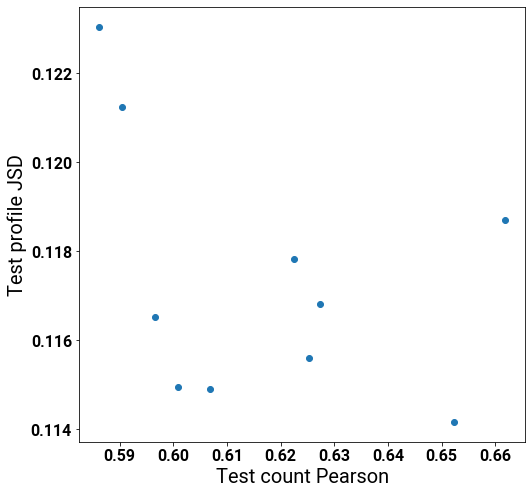

-0.3696969696969697
CEBPB 4


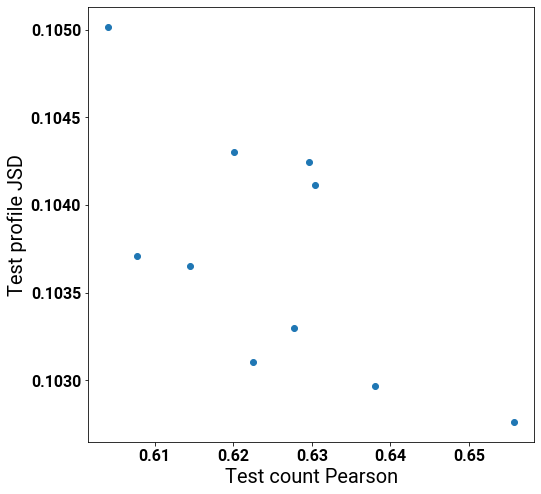

-0.6121212121212121
CEBPB 5


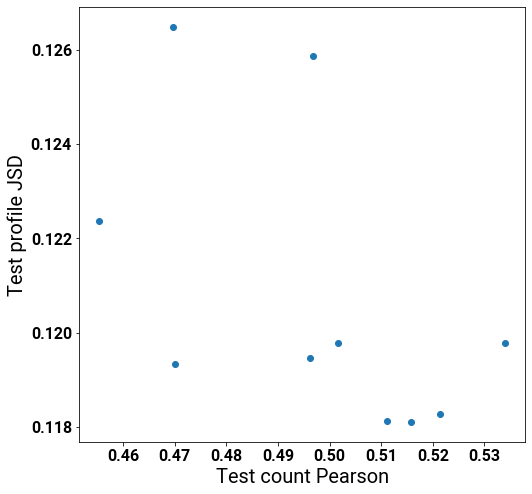

-0.5151515151515151
CEBPB 6


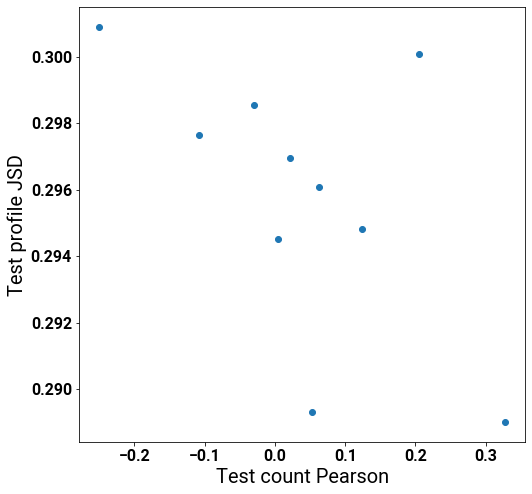

-0.5151515151515151
MAX 0


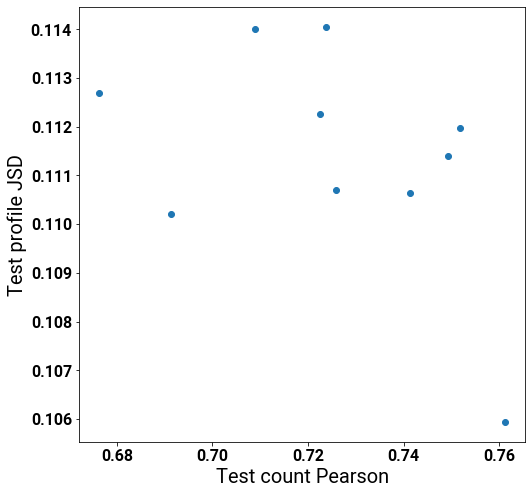

-0.4424242424242424
MAX 1


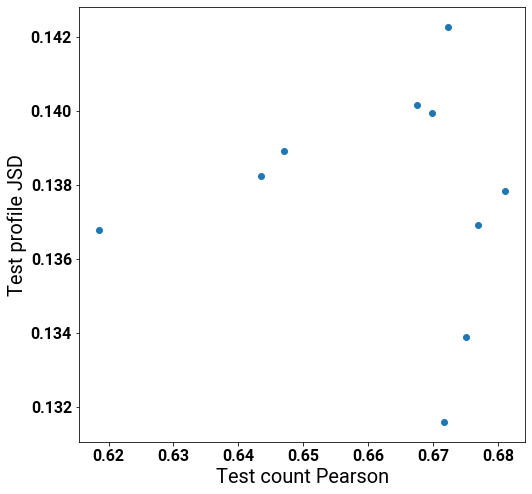

-0.1515151515151515
MAX 2


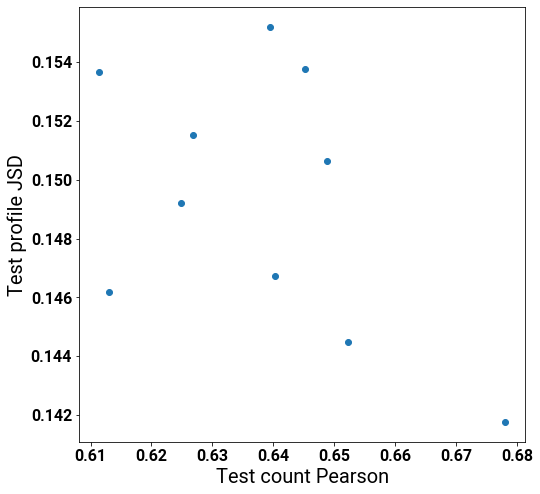

-0.3939393939393939
MAX 3


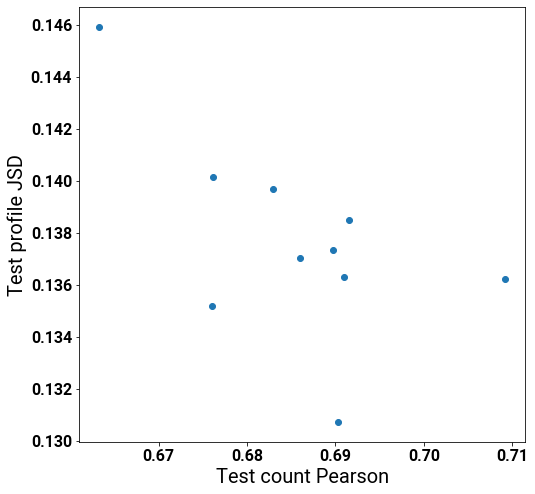

-0.4424242424242424
MAX 4


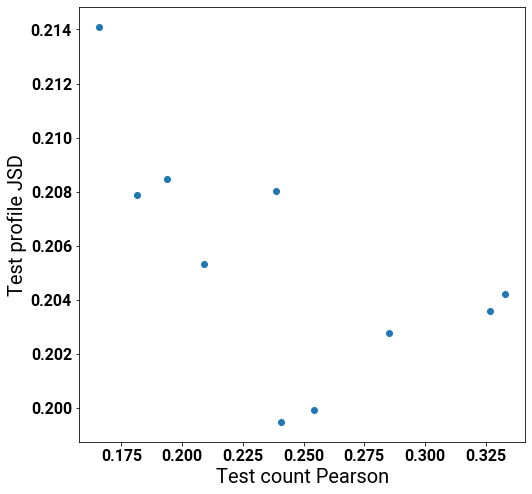

-0.6969696969696969
MAX 5


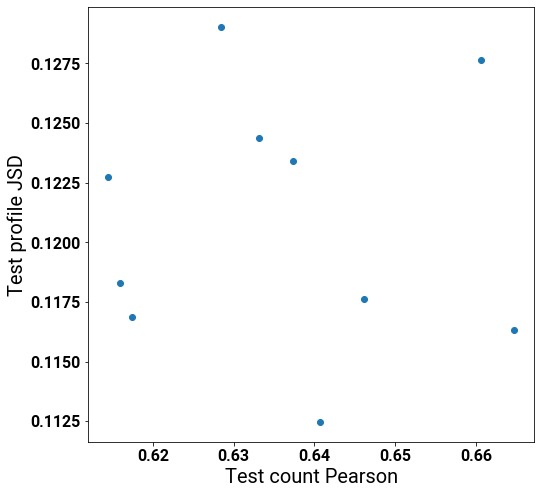

-0.18787878787878787
MAX 6


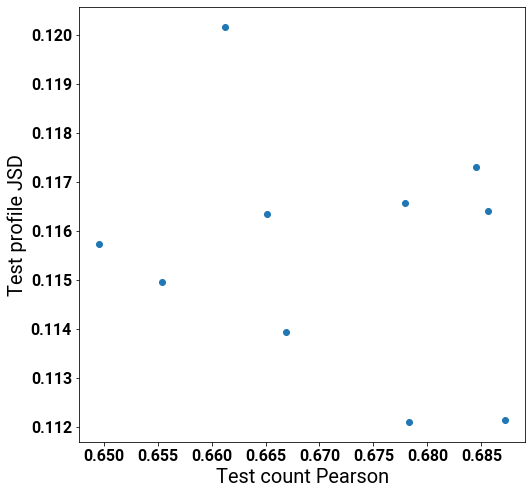

-0.12727272727272726
GABPA 0


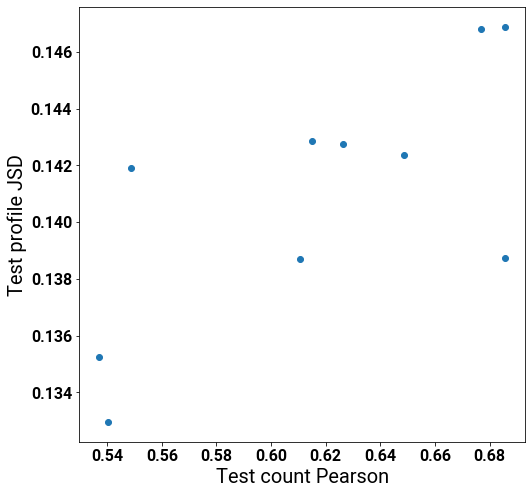

0.6606060606060605
GABPA 1


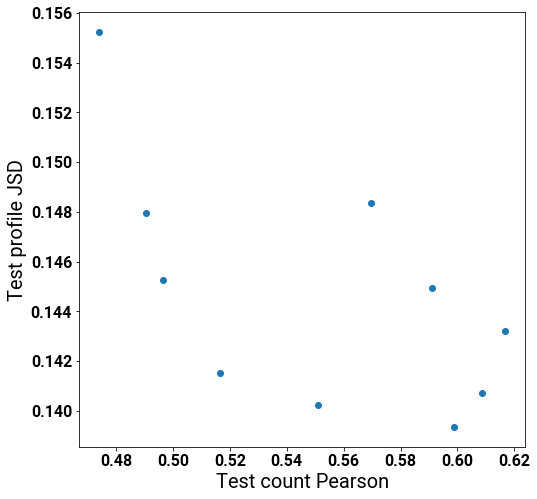

-0.5878787878787878
GABPA 2


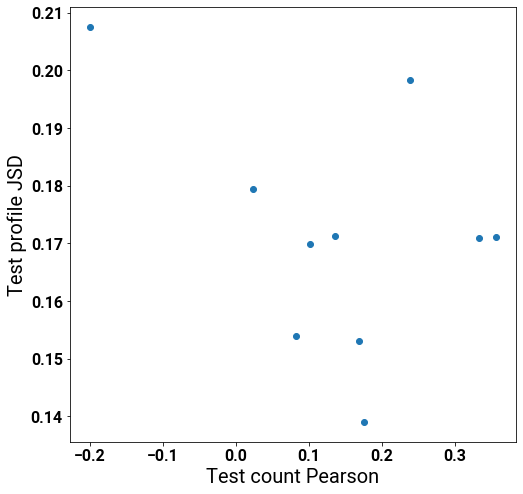

-0.24848484848484845
GABPA 3


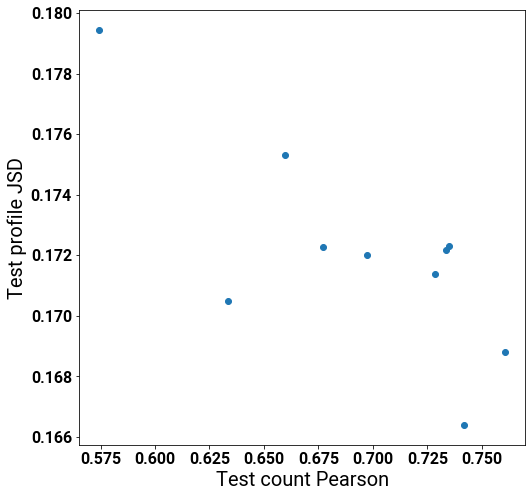

-0.5757575757575757
GABPA 4


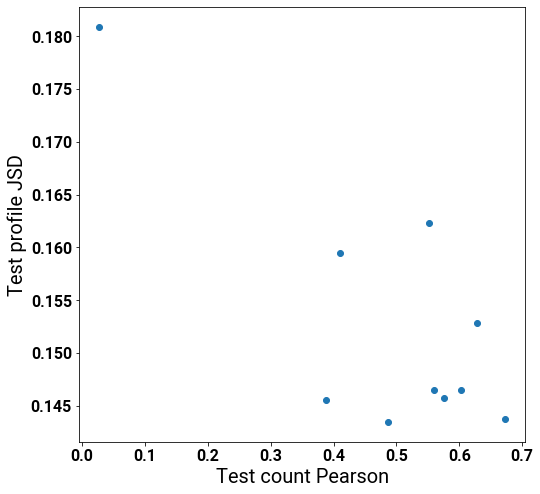

-0.32121212121212117
GABPA 5


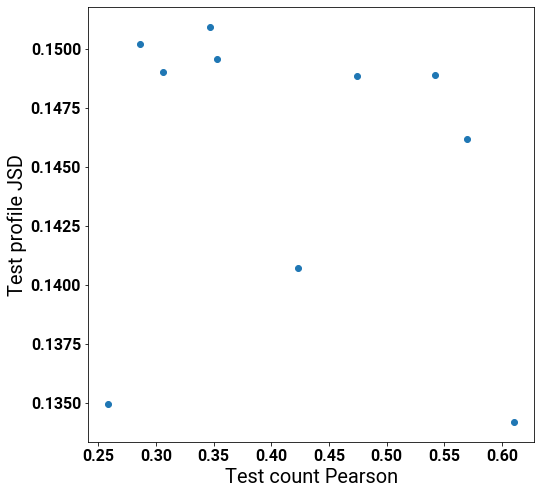

-0.41818181818181815
GABPA 6


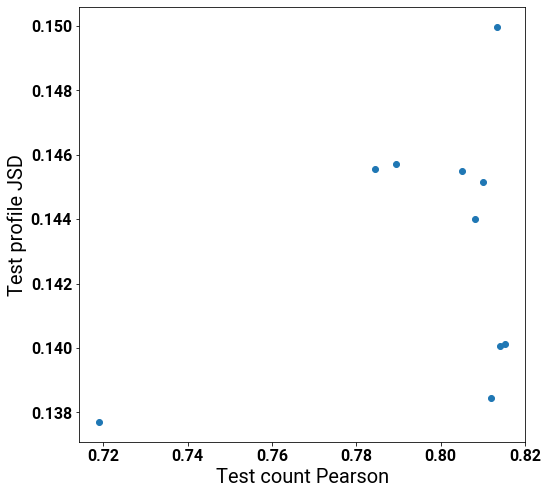

-0.10303030303030303
GABPA 7


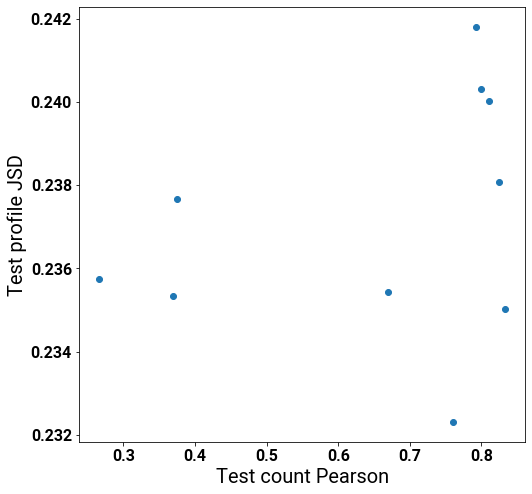

0.2121212121212121
GABPA 8


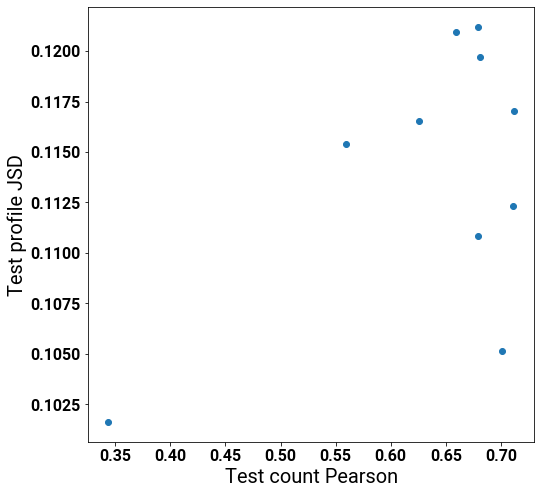

0.10303030303030303
MAFK 0


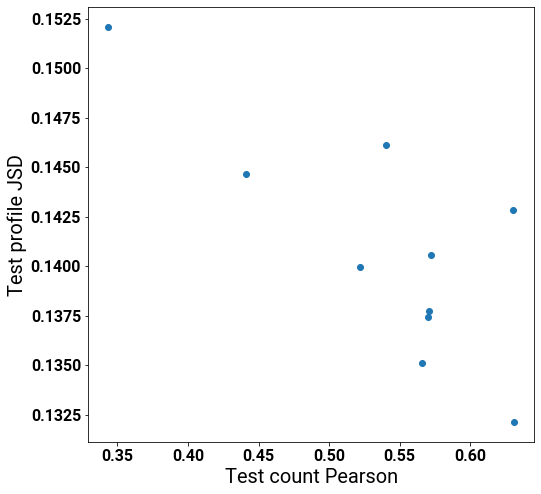

-0.5878787878787878
MAFK 1


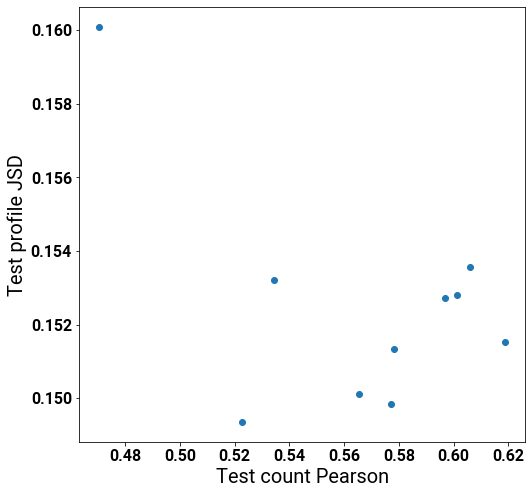

0.10303030303030303
MAFK 2


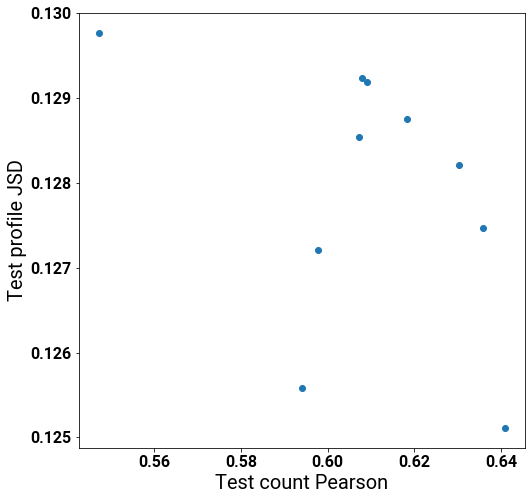

-0.33333333333333326
MAFK 3


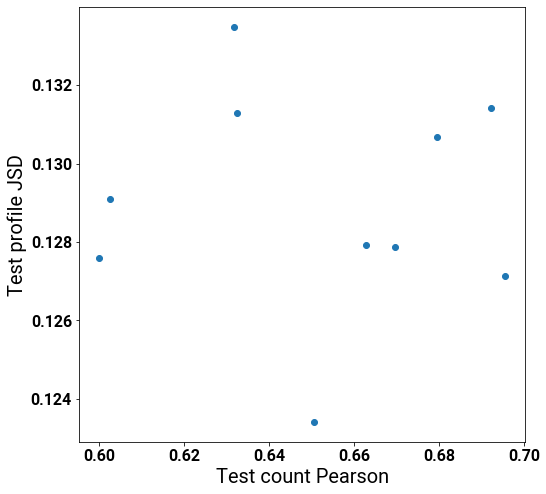

-0.06666666666666665
MAFK 4


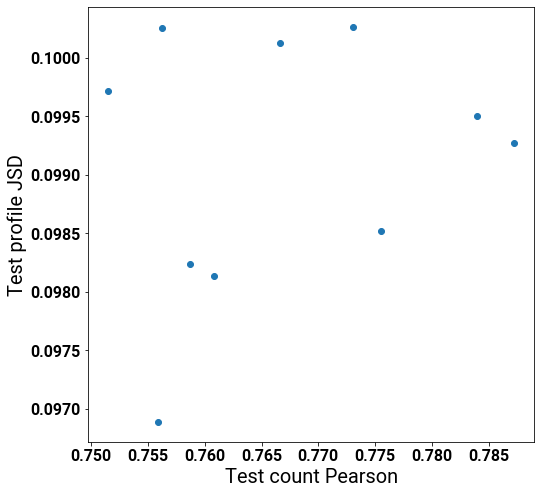

0.11515151515151514
MAFK 5


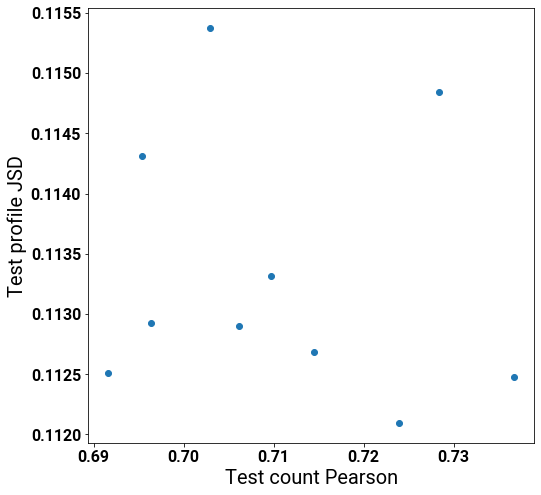

-0.2606060606060606
MAFK 6


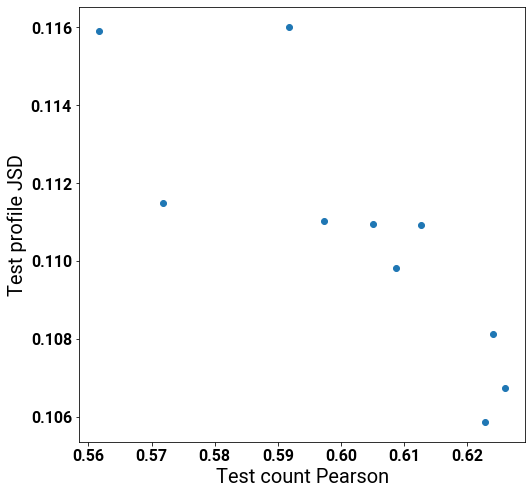

-0.9151515151515152
MAFK 7


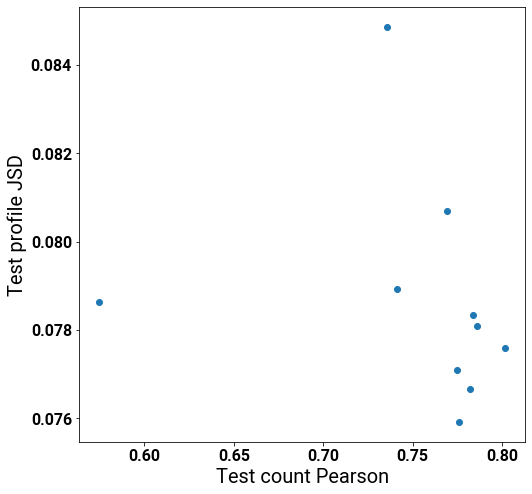

-0.5757575757575757
MAFK 8


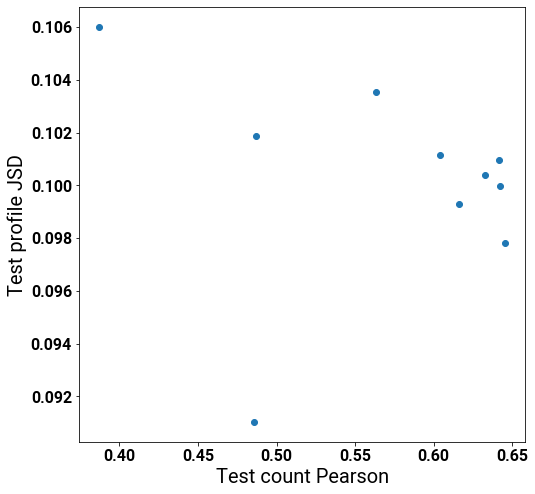

-0.4666666666666666
JUND 0


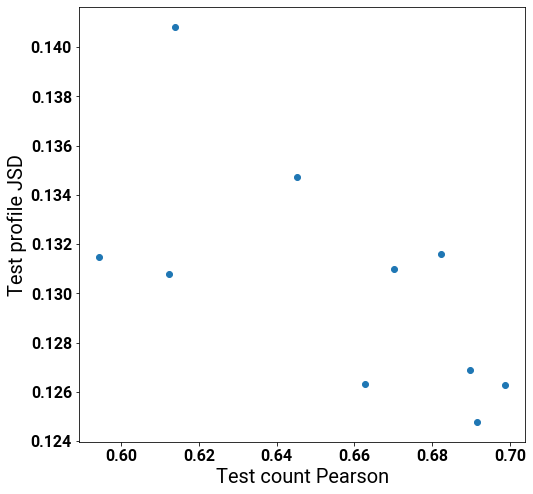

-0.6242424242424242
JUND 1


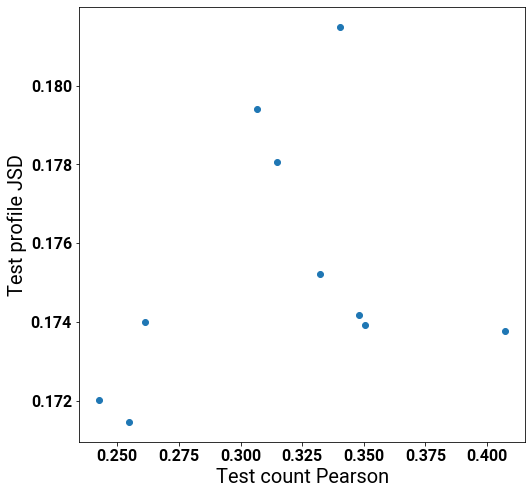

0.22424242424242422
JUND 2


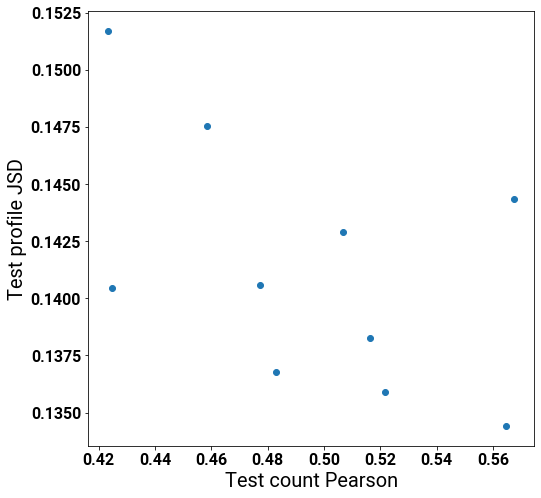

-0.5030303030303029
JUND 3


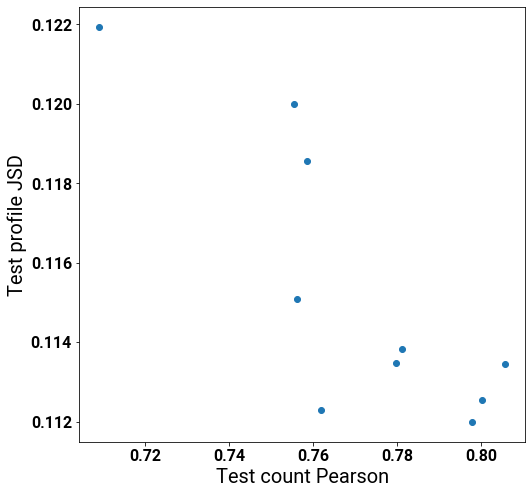

-0.7818181818181817
JUND 4


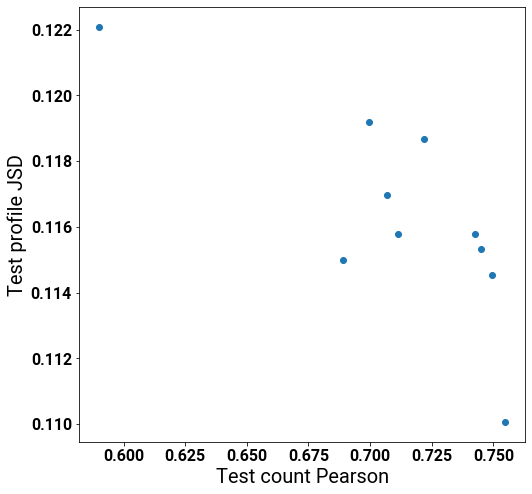

-0.709090909090909
JUND 5


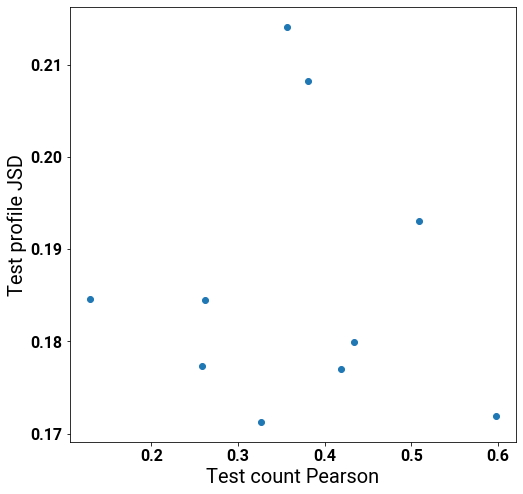

-0.10303030303030303
JUND 6


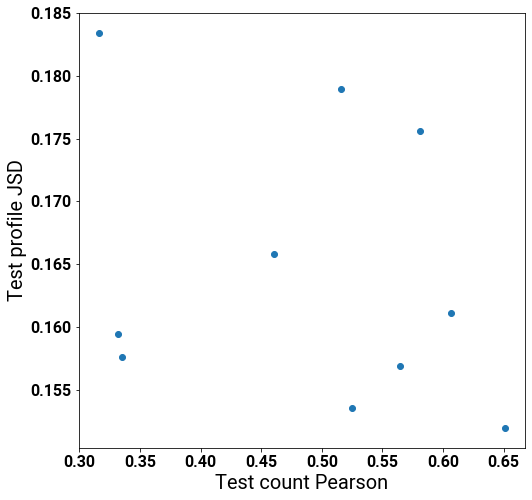

-0.4424242424242424
JUND 7


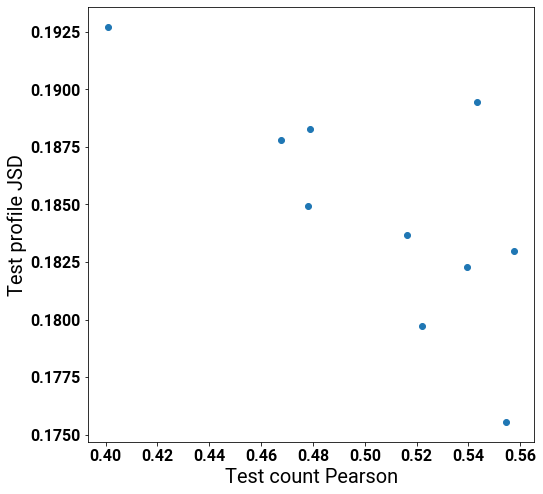

-0.6
JUND 8


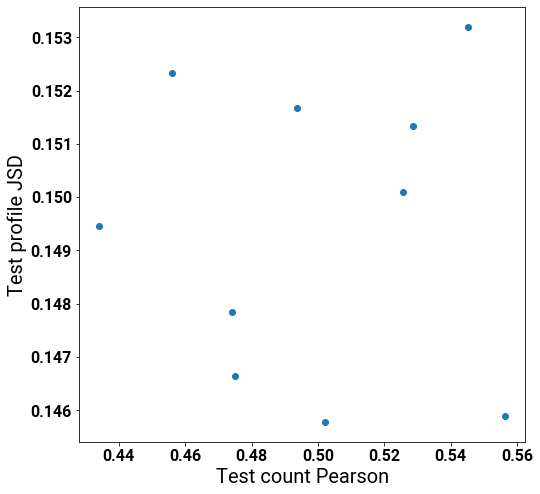

-0.01818181818181818
JUND 9


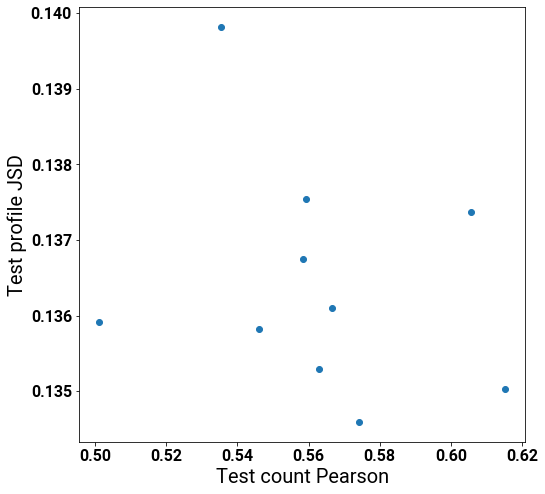

-0.3939393939393939
JUND 10


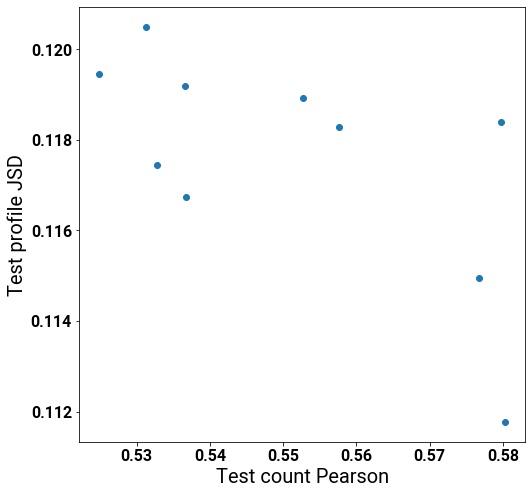

-0.6969696969696969
JUND 11


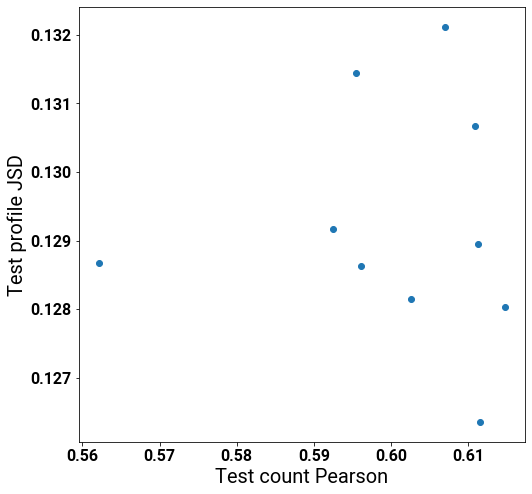

-0.3939393939393939
JUND 12


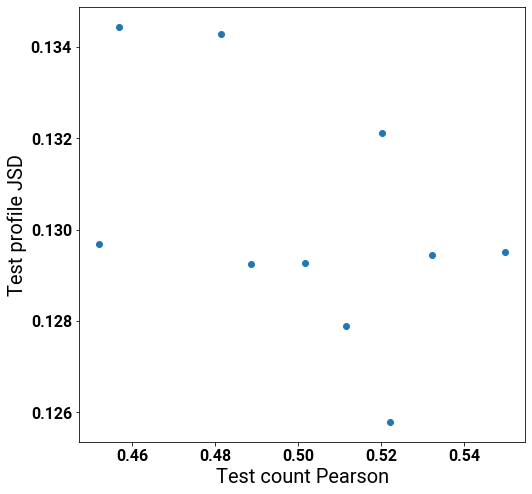

-0.43030303030303024
JUND 13


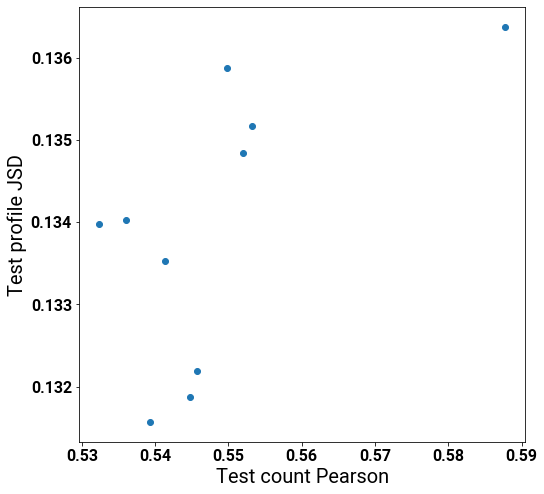

0.6363636363636362
NR3C1-reddytime 0


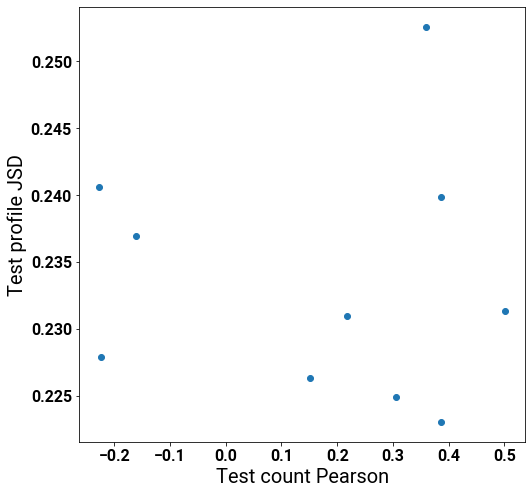

-0.1515151515151515
NR3C1-reddytime 1


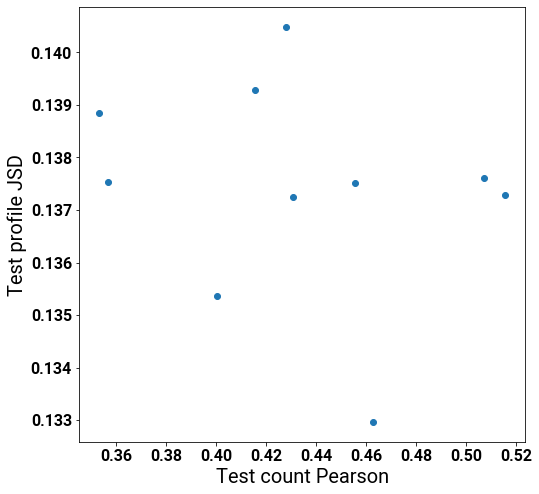

-0.32121212121212117
NR3C1-reddytime 2


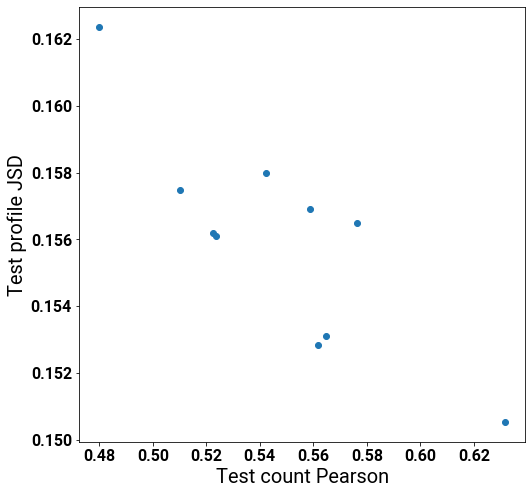

-0.6848484848484848
NR3C1-reddytime 3


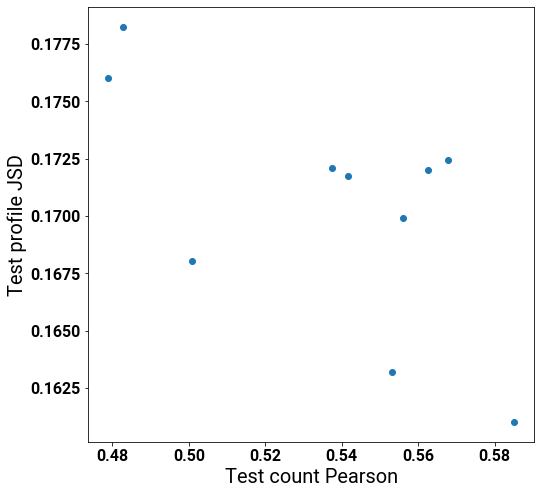

-0.5030303030303029
NR3C1-reddytime 4


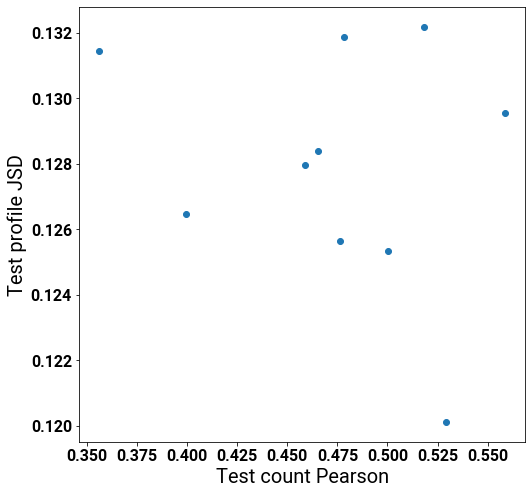

-0.06666666666666665
NR3C1-reddytime 5


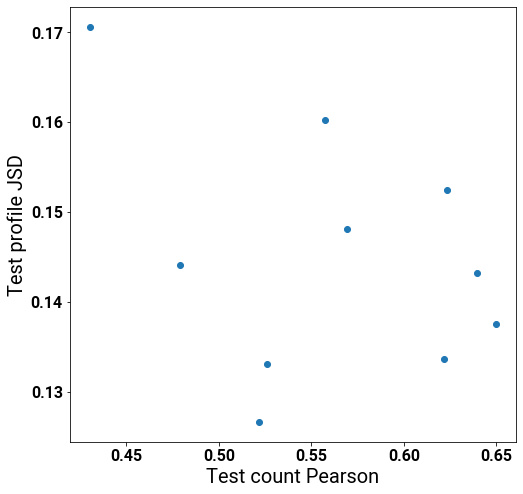

-0.1515151515151515
NR3C1-reddytime 6


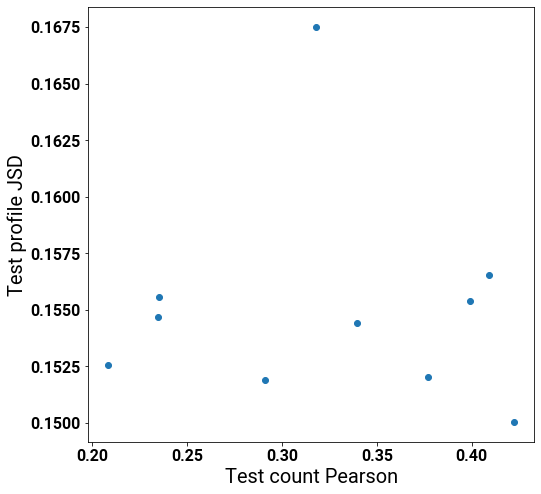

-0.07878787878787878
NR3C1-reddytime 7


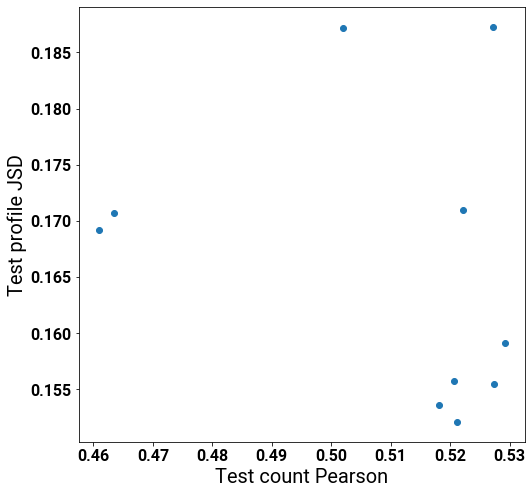

-0.10303030303030303
NR3C1-reddytime 8


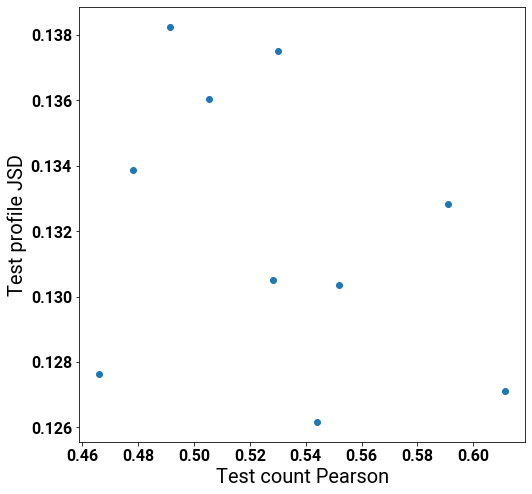

-0.38181818181818183
NR3C1-reddytime 9


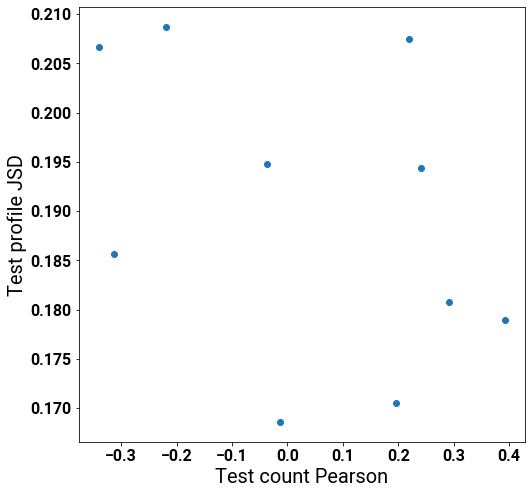

-0.3939393939393939
NR3C1-reddytime 10


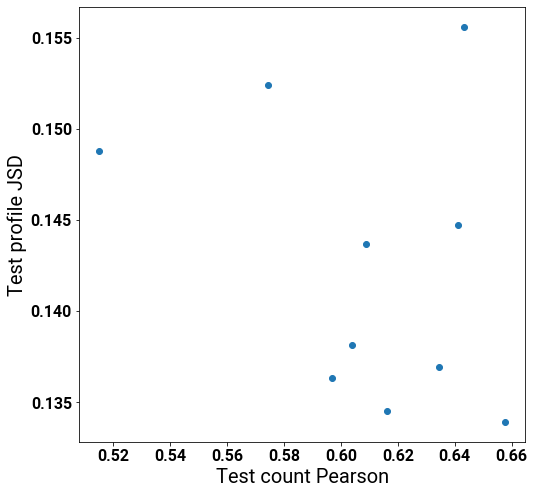

-0.2606060606060606
NR3C1-reddytime 11


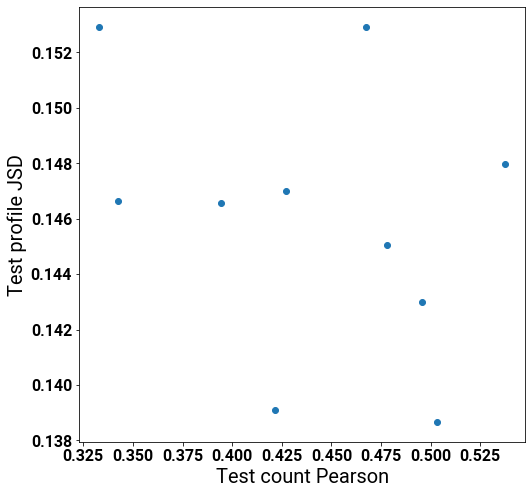

-0.33333333333333326
NR3C1-reddytime 12


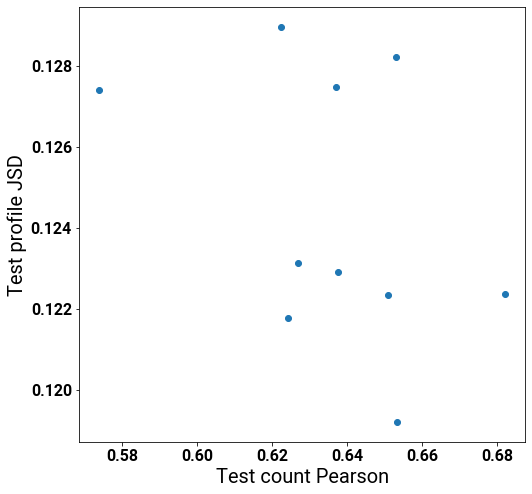

-0.406060606060606
NR3C1-reddytime 13


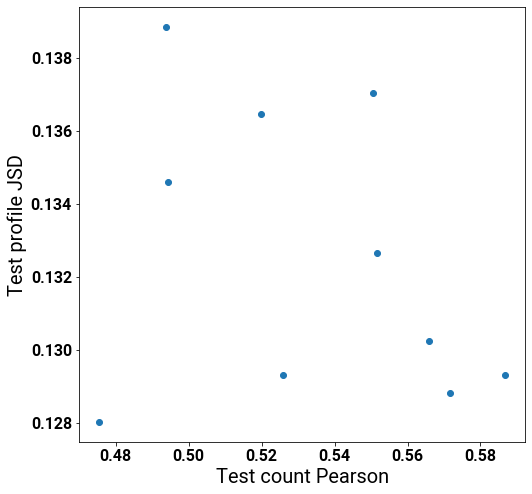

-0.23636363636363633
NR3C1-reddytime 14


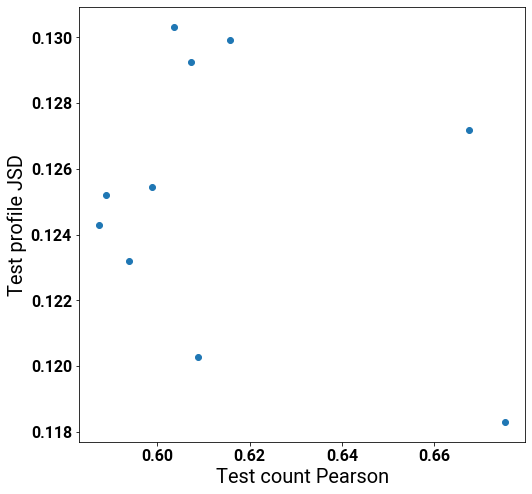

0.01818181818181818
NR3C1-reddytime 15


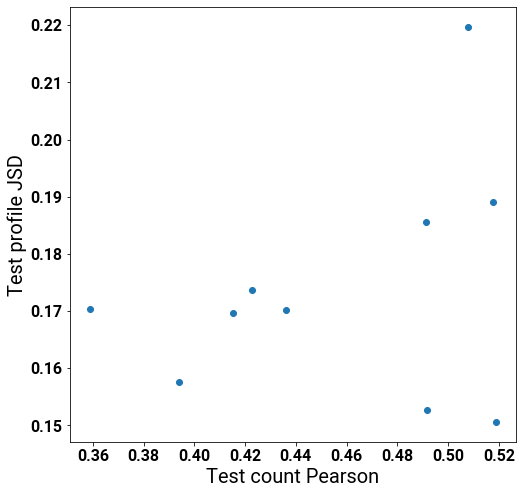

0.09090909090909088
REST 0


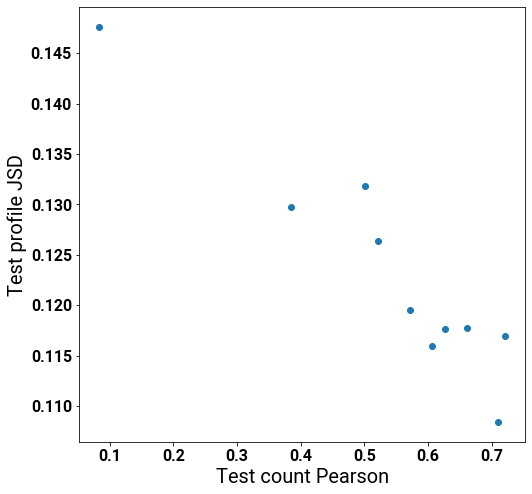

-0.8787878787878788
REST 1


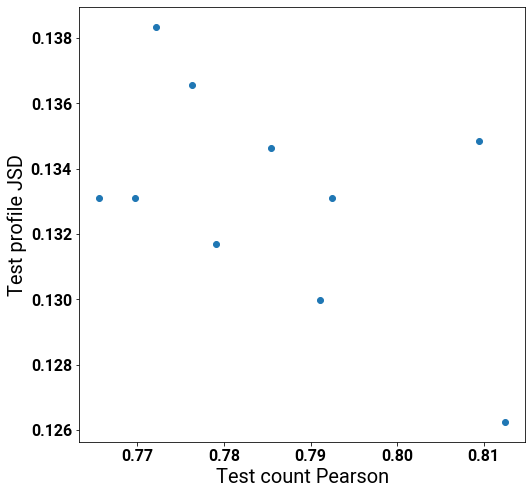

-0.41818181818181815
REST 2


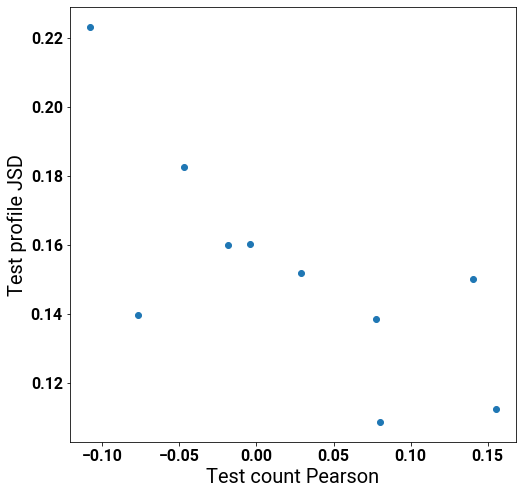

-0.7212121212121211
REST 3


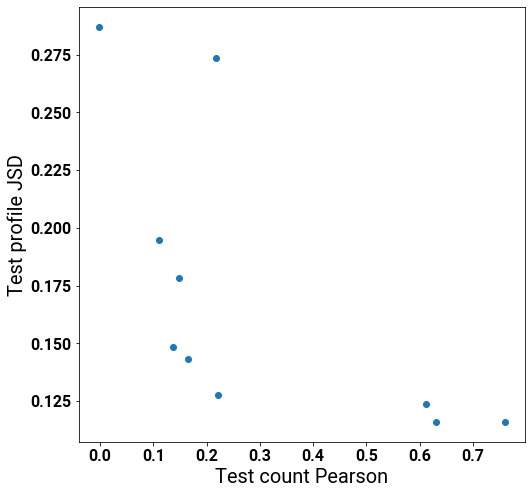

-0.8545454545454544
REST 4


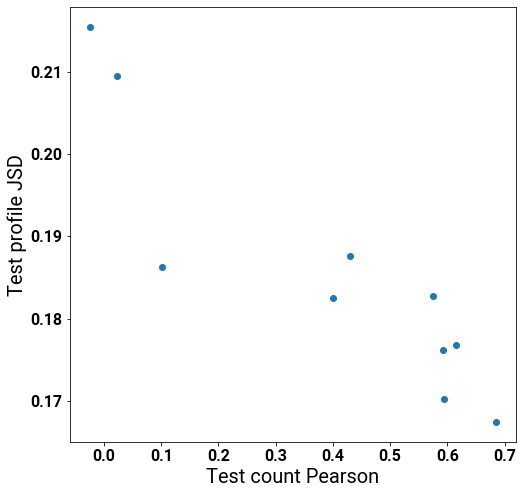

-0.9030303030303028
REST 5


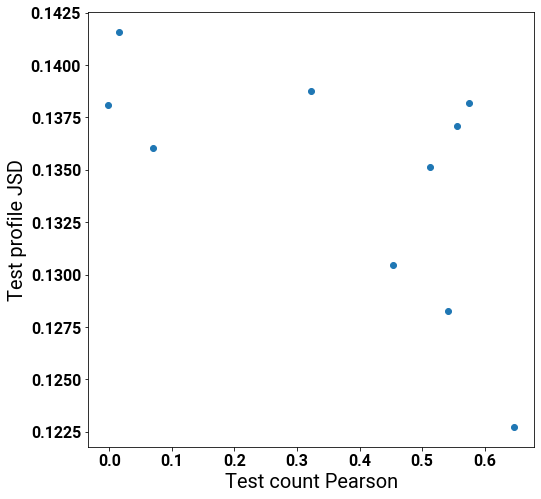

-0.5030303030303029
REST 6


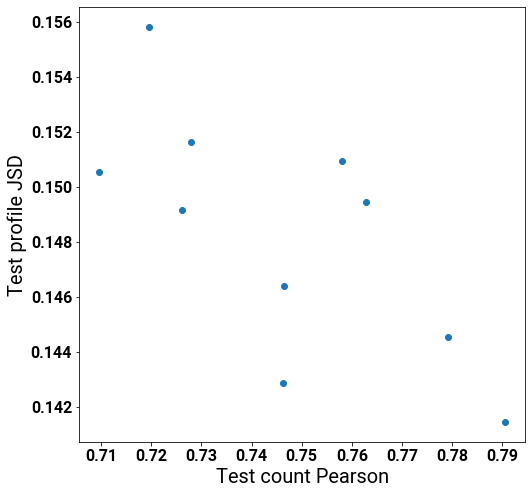

-0.6
REST 7


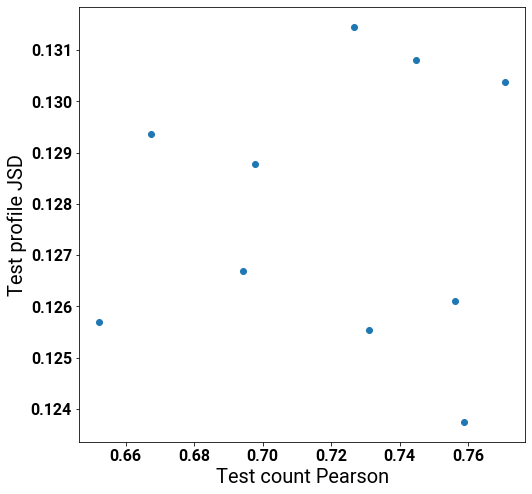

-0.006060606060606061
REST 8


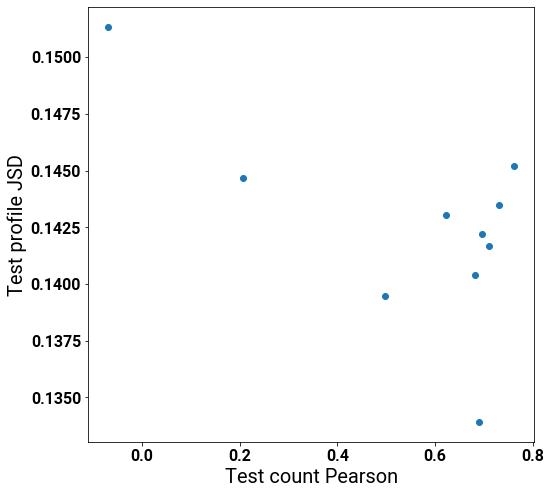

-0.06666666666666665
REST 9


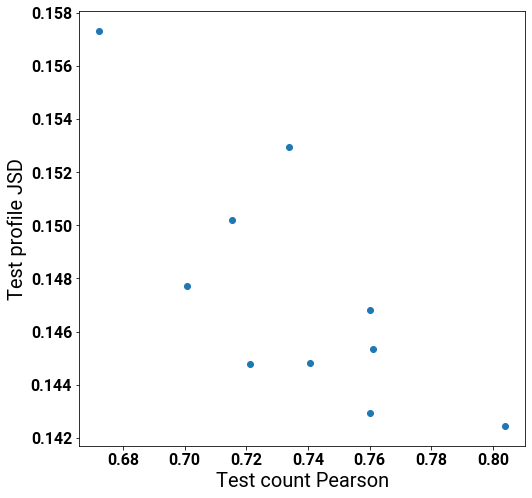

-0.7333333333333332
REST 10


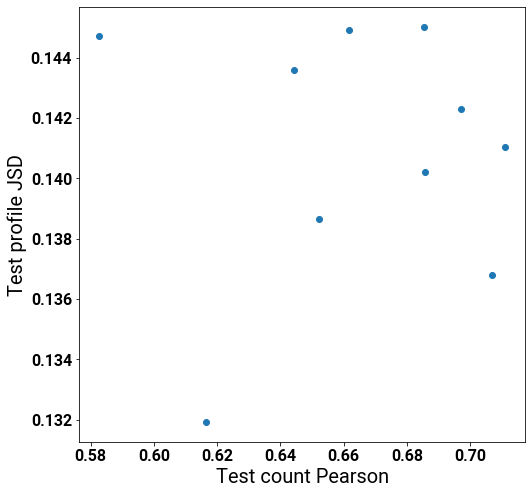

-0.12727272727272726
REST 11


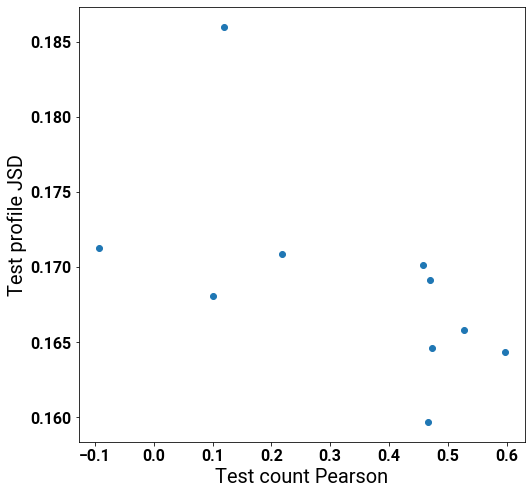

-0.709090909090909
REST 12


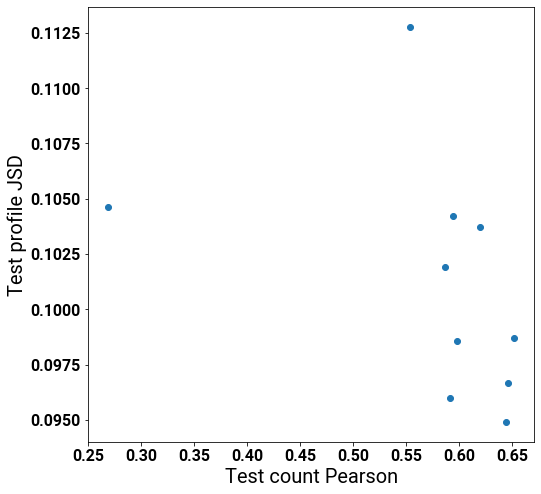

-0.6
REST 13


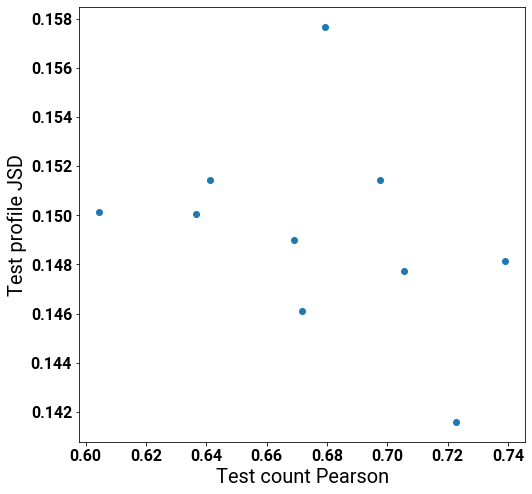

-0.4545454545454545
REST 14


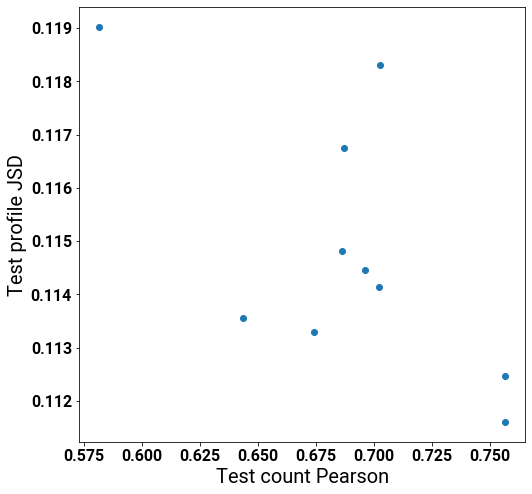

-0.43030303030303024
REST 15


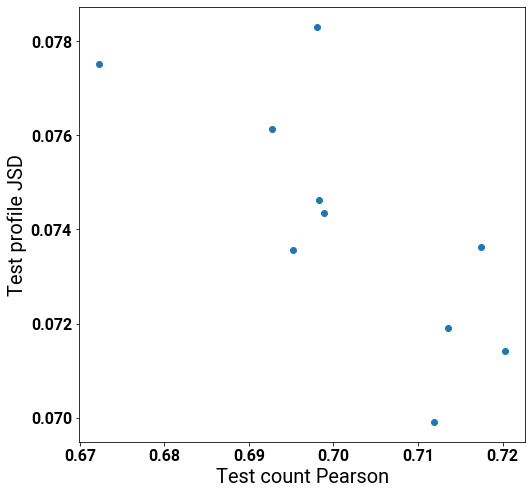

-0.709090909090909
REST 16


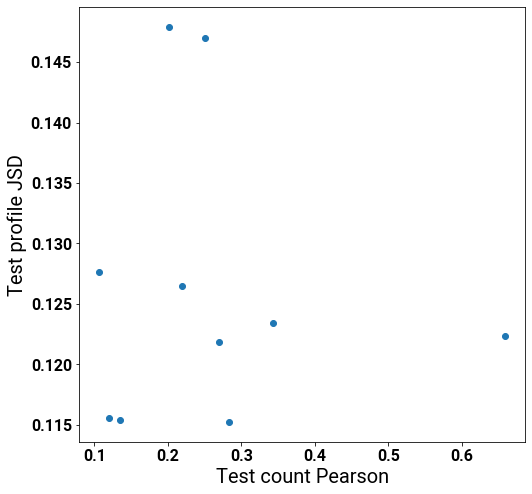

-0.16363636363636364
REST 17


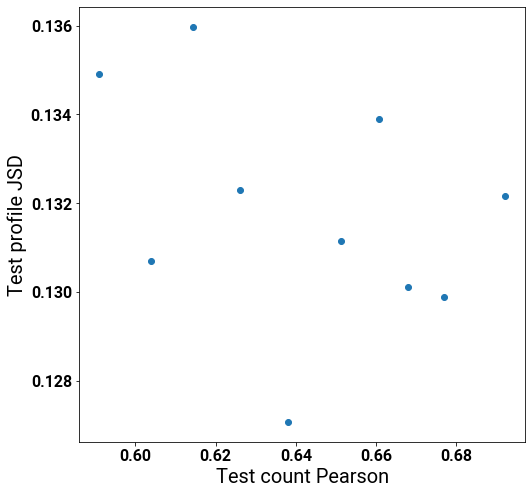

-0.41818181818181815
REST 18


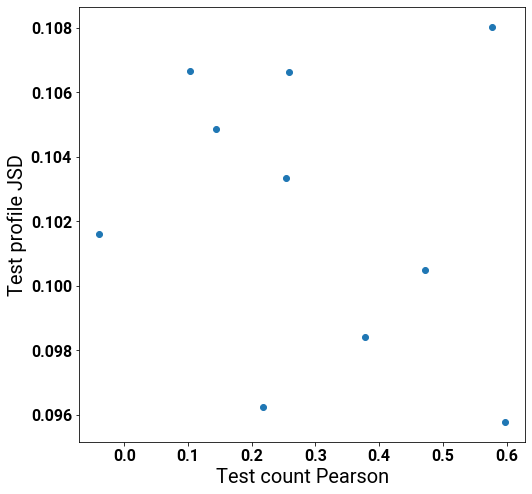

-0.23636363636363633
REST 19


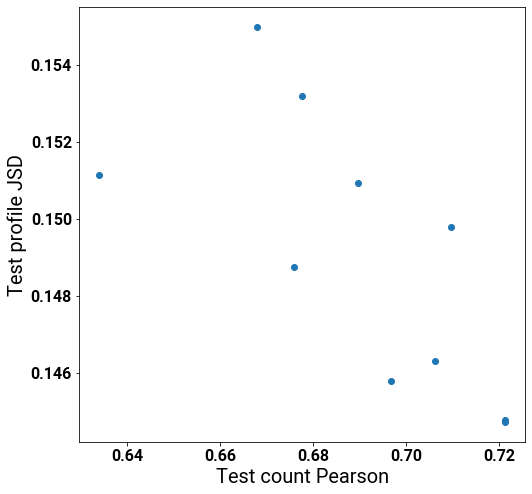

-0.8060606060606059


In [7]:
corrs = []
for tf_name in tfs:
    for task_index in range(tf_num_tasks[tf_name]):
        print(tf_name, task_index)
        metrics = [
            import_metrics_json(
                os.path.join(
                    "/users/amtseng/tfmodisco/models/trained_models/singletask_profile",
                    "%s_singletask_profile_fold%d" % (tf_name, fold_num),
                    "task_%d" % task_index
                ),
                best_runs[tf_name][task_index][fold_num - 1]
            )
            for fold_num in range(1, 11)
        ]
        corr = plot_count_vs_profile_performance(metrics)
        print(corr)
        corrs.append(corr)

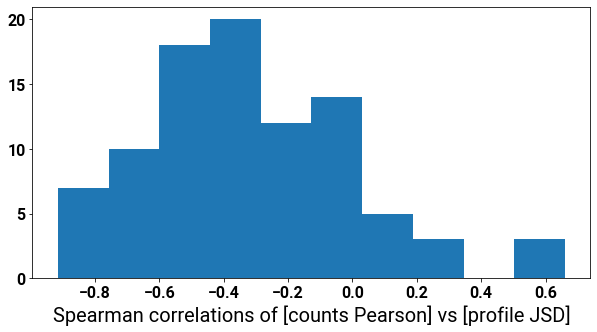

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(corrs, bins=10)
ax.set_xlabel("Spearman correlations of [counts Pearson] vs [profile JSD]")
plt.show()